### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [49]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


1. display 5 columns from dataset

In [29]:
#1
url =('https://raw.githubusercontent.com/Rosdiana13/Week3_DM/refs/heads/main/MBA.csv')
df = pd.read_csv(url)
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [30]:
#2
df.info()
#conclusion
# dataset ini memliki 6.194 entri dan mempunya total 10 kolom,
# nama columnya apa aja beserta tipe datanya 
# kemudian ada kolum yang menggunakn 1 dtype bool, 
# Ada kolum yang menggunakn 3 dtype float, 
# Ada kolum yang menggunakn 1 dtype int, 
# Ada  kolum yang menggunakn 5 stype object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [31]:
#3a
df['admission'].value_counts(dropna=False)


NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64

In [32]:
#3b
df['race'].value_counts(dropna=False)

NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64

4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [33]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)


5. recheck missing value

In [34]:
#5
missing_values_df = pd.DataFrame({
    'Missing Values': df.isnull().sum()
})
missing_values_df

,Missing Values
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [35]:
# 6
df.drop(columns=['application_id'], inplace=True)

7. show describe column and conclude what the insight is from that column

In [36]:
#7
df.describe()
#conclusion
# GPA (Grade Point Average):
# Rata-rata (mean) GPA pelamar adalah 3.25.
# Standar deviasi (std) GPA adalah 0.15, menunjukkan bahwa variasi nilai GPA tidak terlalu besar di sekitar nilai rata-rata.
# Nilai GPA minimum adalah 2.65, sedangkan maksimum adalah 3.77.
# Nilai GPA median (50%) adalah 3.25, menunjukkan bahwa setengah dari pelamar memiliki GPA di bawah atau sama dengan 3.25.
# Kuartil pertama (25%) adalah 3.15, dan kuartil ketiga (75%) adalah 3.35, menunjukkan bahwa mayoritas pelamar memiliki GPA antara 3.15 dan 3.35.

# GMAT (Graduate Management Admission Test)
# Rata-rata nilai GMAT pelamar adalah 651.09.
# Standar deviasi adalah 49.29, menunjukkan variasi yang lebih besar dibandingkan GPA.
# Nilai GMAT minimum adalah 570, dan maksimum adalah 780.
# Nilai median GMAT adalah 650.
# Kuartil pertama (25%) adalah 610, sedangkan kuartil ketiga (75%) adalah **680**, menunjukkan bahwa mayoritas pelamar memiliki nilai GMAT antara 610 dan 680.

# Work Experience (Pengalaman Kerja):
# Rata-rata pengalaman kerja pelamar adalah sekitar 5 tahun.
# Standar deviasi adalah 1.03, menunjukkan variasi yang moderat dalam pengalaman kerja.
# Pengalaman kerja minimum adalah 1 tahun, sedangkan maksimum adalah 9 tahun.
# Nilai median pengalaman kerja adalah 5 tahun, menunjukkan bahwa setengah dari pelamar memiliki pengalaman kerja 5 tahun atau lebih.
# Kuartil pertama (25%) adalah 4 tahun dan kuartil ketiga (75%) adalah 6 tahun, menunjukkan bahwa mayoritas pelamar memiliki pengalaman kerja antara 4 hingga 6 tahun.


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

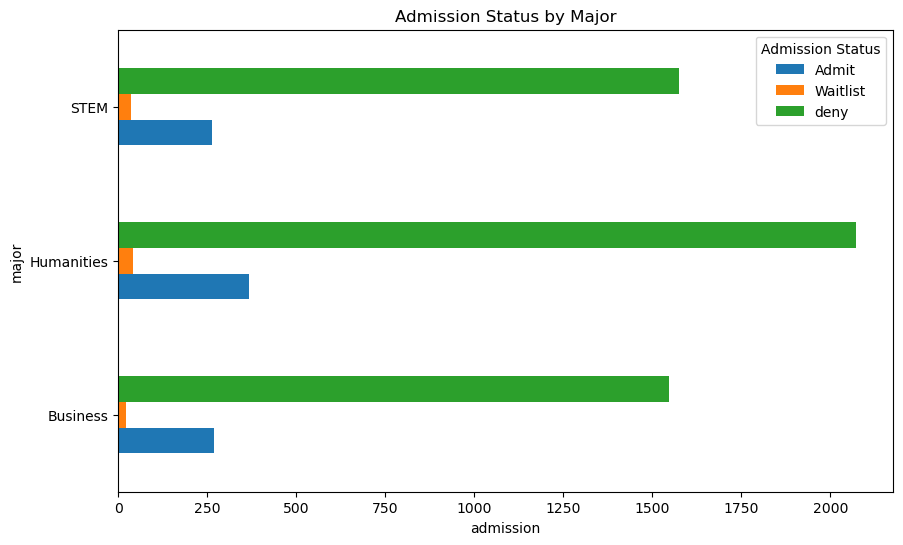

In [37]:
#8
# Group data by major and admission status, then count the occurrences
count_type_by_quality = df.groupby(['major',
'admission'])['admission'].count().unstack()

# Create a horizontal bar chart
count_type_by_quality.plot (kind='barh',
figsize=(10,6))

# Customize the chart
plt.title('Admission Status by Major')
plt.xlabel('admission')
plt.ylabel('major')
plt.legend(title='Admission Status')

# Show the chart
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

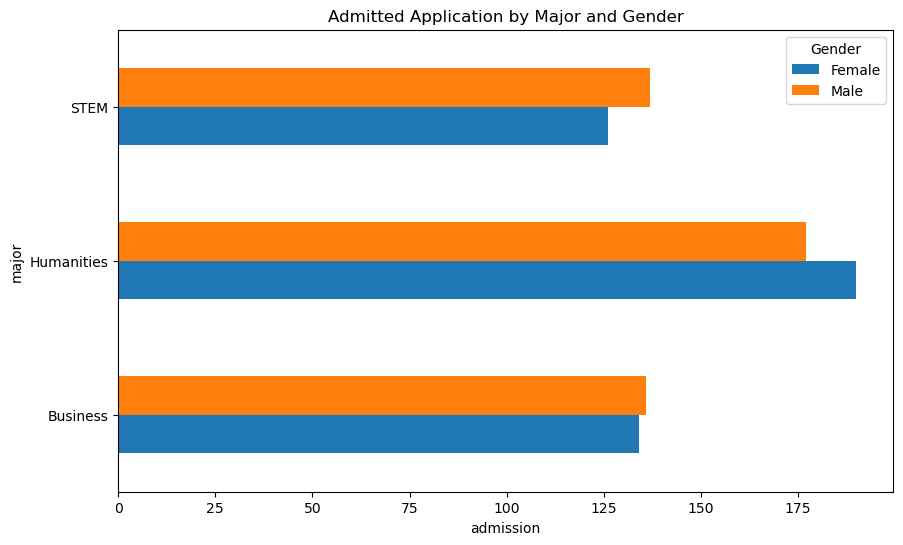

In [43]:
#9

# Filter the DataFrame to include only admitted applicants
admitted_application = df[df['admission']=='Admit']

# Group data by major and gender, then count the occurrences
count_gender_by_major = admitted_application.groupby(['major',
'gender'])['gender'].count().unstack()

# Create a horizontal bar chart
count_gender_by_major.plot (kind='barh',
figsize=(10,6))

# Customize the chart
plt.title('Admitted Application by Major and Gender')
plt.xlabel('admission')
plt.ylabel('major')
plt.legend(title='Gender')

# Show the chart
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

In [ ]:
#10
# Setelah mempelajari, saya dapat mengunngkapkan bahwa 
# visualisasi data tidak hanya berfungsi untuk menapilkan informasi,
# tetapi juga membantu dalam mengidentifikasi pola dan tren yang memungkinkan
# tidak terlihat hanya dengan melihat angka. Dengan menyajikan informasi secara visual, kita dapat 
# membuat analisis lebih mudah dipahami oleh pemimpin atau berbagai  kepentingan, termasuk mereka yang mungkin 
# tidak memiliki latar belakang analitis, sehingga memfasilitasi pengambilan keputusan yang lebih baik.

11. create your own insightful visualization and explain it in at least 2 sentences

In [ ]:
#11
# Setelah mempelajari visualisasi, 
# saya menyadari bahwa visualisasi data membantu
#  mengungkap pola dan tren yang mungkin tidak terlihat 
# dari angka saja. Dengan menyajikan data secara visual, 
# kita dapat menyampaikan informasi dengan lebih jelas dan
# memudahkan pengambilan keputusan yang lebih baik.

array(['Female', 'Male'], dtype=object)

12. encode categorical columns and display the results

In [46]:
#12
# Encode categorical columns (except the admission column)

df['admission'] = df['admission'].fillna('deny')

label_encoders = {}
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']  # Columns you want to encode
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


In [47]:
# Encode the admission column
admission_encoder = LabelEncoder()
df['admission'] = admission_encoder.fit_transform(df['admission'])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

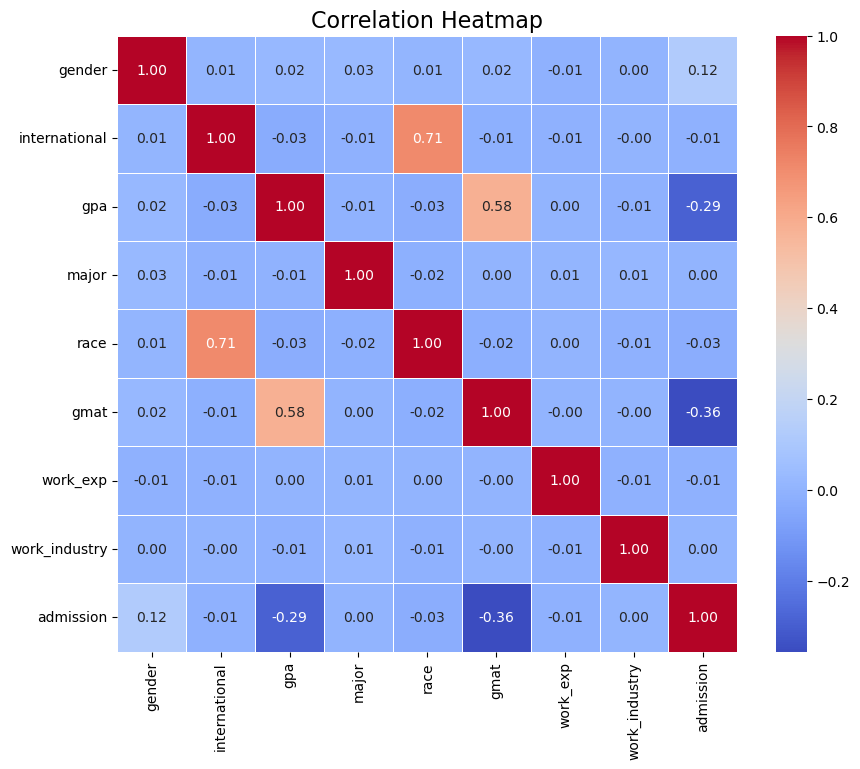

In [55]:
#13

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#Conclusion
# Heatmap korelasi menunjukkan bahwa race
#  memiliki korelasi positif kuat dengan international
#  (0.71), menunjukkan bahwa pelamar dari ras tertentu 
# cenderung lebih banyak yang merupakan pelajar internasional.
#  Selain itu, terdapat korelasi positif antara GMAT dan GPA
#  (0.58), yang menunjukkan bahwa pelamar dengan nilai GMAT lebih tinggi cenderung memiliki GPA lebih tinggi. 
# Sebaliknya, admission menunjukkan korelasi negatif dengan GPA
#  (-0.36), mengindikasikan bahwa pelamar dengan GPA lebih rendah mungkin memiliki peluang penerimaan yang lebih rendah.



**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = df.drop(columns=['admission'])
y = df['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.77


In [58]:
# Get the average GPA of all applicants
average_gpa = df['gpa'].mean()


# Let's map the exact values from the dataset to Lisa's profile
lisa_data = {
    'gender': le_dict['gender'].transform([df['gender'].unique()[0]])[0],  # Assuming Female is the first value
    'international': le_dict['international'].transform([df['international'].unique()[0]])[0],  # Assuming local (No)
    'gpa': average_gpa,  # The average GPA of all applicants
    'major': le_dict['major'].transform([df['major'].unique()[1]])[0],  # Assuming Entrepreneurship or similar
    'race': le_dict['race'].transform([df['race'].unique()[0]])[0],  # Assuming Asian or similar
    'gmat': 580,  # Lisa's GMAT score
    'work_exp': 2,  # Lisa worked from 2018 to 2020 (2 years of work experience)
    'work_industry': le_dict['work_industry'].transform([df['work_industry'].unique()[2]])[0],  # Assuming Finance
}

# Create a DataFrame with Lisa's data
lisa_df = pd.DataFrame([lisa_data])

# Make a prediction using the trained model
lisa_prediction = model.predict(lisa_df)

# Decode the prediction back to the original label
lisa_admission_status = le_dict['admission'].inverse_transform(lisa_prediction)[0]

# Display the prediction result
print(f"Prediction for Lisa: {'Accepted' if lisa_admission_status == 'Admit' else 'Denied'}")

NameError: name 'le_dict' is not defined